<H2 align='center'>                PREDICTING THE BEST LOCALITY TO LIVE & START A RESTAURANT BUSINESS IN BANGALORE </H2>

<p>Bangalore is one of the fastest growing metropolitan in India and is also know as the Silicon Valley of India. It has the second highest number of start-ups in India after Delhi-NCR region. 
Because of this growth many people are planning to move to Bangalore for new business opportunities and accommodation.
If someone is looking to start a restaurant business in Bangalore, that person might look to start the restaurant in a region where mostly people in the city go for food, basically which has most of the restaurants. 
Also, for accommodation, people generally look for a place which is near to market, ATMs, theatre, metro station, park etc.
Machine learning clustering can help in dividing the regions of Bangalore into various cluster and this can help in identifying the region with fewer restaurants. 
</p>

<h3>Coding Part</h3>

<p>Before starting the coding part, it is better to import the libraries that would be required in the project. However, at this moment it is not easy to identify all the libraries to import and we will keep on importing the libraries as and when requeired as well.</p>

In [179]:
#library to load Json data
import json
#Pandas is used in many cases, specially for handling DataFrames
import pandas as pd
#Folium is used for plotting maps
import folium
#This library is used for visualization
import matplotlib.pyplot as plt

<p>I have already downloaded the GeoJson file conatining the latitude and longitude of constituencies and wards in Bangalore and uploaded it in the environment. Now we will be reading the content of json file and load it in a variable.</p>

In [2]:
#bgn=pd.read_json('banglore-geojson.json')
with open('banglore-geojson.json') as bang_data:
    bangalore_data = json.load(bang_data)

<p>Displaying the content of Json file.</p>

In [3]:
bangalore_data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'ASS_CONST_': '150',
    'ASS_CONST1': 'Yelahanka',
    'WARD_NO': 2.0,
    'WARD_NAME': 'Chowdeswari Ward',
    'POP_M': 10402.0,
    'POP_F': 9224.0,
    'POP_SC': 2630.0,
    'POP_ST': 286.0,
    'POP_TOTAL': 19626.0,
    'AREA_SQ_KM': 7.06,
    'LAT': 13.121709445639,
    'LON': 77.58042209477,
    'RESERVATIO': 'General'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[77.59229387222348, 13.097196193805827],
       [77.5909446804082, 13.09842185670555],
       [77.58908003112553, 13.100056732116494],
       [77.58733089155656, 13.101374720028643],
       [77.5871201872105, 13.101557392381482],
       [77.58690433786334, 13.101726651221453],
       [77.58651391149253, 13.1020326990065],
       [77.5859111620258, 13.102505182299376],
       [77.5850651716457, 13.103173181310986],
    

In [4]:
cons_bang=bangalore_data['features']

<p>In order to analyse the content, we will extract the content of only first ward. The whole Json file is huge and identifying each attribute from whole Json file is a tedious task. </p>

In [5]:
cons_bang[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'ASS_CONST_': '150',
  'ASS_CONST1': 'Yelahanka',
  'WARD_NO': 2.0,
  'WARD_NAME': 'Chowdeswari Ward',
  'POP_M': 10402.0,
  'POP_F': 9224.0,
  'POP_SC': 2630.0,
  'POP_ST': 286.0,
  'POP_TOTAL': 19626.0,
  'AREA_SQ_KM': 7.06,
  'LAT': 13.121709445639,
  'LON': 77.58042209477,
  'RESERVATIO': 'General'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[77.59229387222348, 13.097196193805827],
     [77.5909446804082, 13.09842185670555],
     [77.58908003112553, 13.100056732116494],
     [77.58733089155656, 13.101374720028643],
     [77.5871201872105, 13.101557392381482],
     [77.58690433786334, 13.101726651221453],
     [77.58651391149253, 13.1020326990065],
     [77.5859111620258, 13.102505182299376],
     [77.5850651716457, 13.103173181310986],
     [77.58410452699253, 13.104024083555247],
     [77.58319712236873, 13.104900415224554],
     [77.5825264168394, 13.10561339006328],
     [77.58183549579502, 13.106420037985492],

<p>We cannot work directly on Json file, so we will have to convert the Json file into the dataframe, which is easy to analyse and manipulate. For this we will first define the DF with required columns and then fetch data from Json and put it in DF</p>

In [6]:
col=['Ward','Constituency','Latitude','Longitude']

In [7]:
bang_area=pd.DataFrame(columns=col)

In [8]:
bang_area

,Ward,Constituency,Latitude,Longitude


In [9]:
for data in cons_bang:
    ward_name=data['properties']['WARD_NAME']
    cons_name=data['properties']['ASS_CONST1']
    lat=data['properties']['LAT']
    lon=data['properties']['LON']
    bang_area=bang_area.append({'Ward':ward_name,'Constituency':cons_name,'Latitude':lat,'Longitude':lon},ignore_index=True)

<p>Final DataFrame with Ward, constituenct, and latitude and longitude of each ward</p>

In [10]:
bang_area.head()

,Ward,Constituency,Latitude,Longitude
0,Chowdeswari Ward,Yelahanka,13.121709,77.580422
1,Atturu,Yelahanka,13.102805,77.560038
2,Yelahanka Satellite Town,Yelahanka,13.090987,77.583925
3,Vijnanapura,K.R. Puram,13.006063,77.669565
4,Basavanapura,K.R. Puram,13.016847,77.715456


<p>There are total 27 constituencies as per our data.</p>
<p>Note: Data is bit old. At present, number of constituencies might differ.</p>

In [182]:
print("Total constituencies:",len(bang_area['Constituency'].unique())," Total Wards:",len(bang_area['Ward'].unique()))

Total constituencies: 27  Total Wards: 198


<p>Now I will try to plot the number of wards in each constituency. For that. first I will group the data by Constituency to get the count of wards in each constituency</p>

In [96]:
consGrDt=bang_area.groupby('Constituency').count()

In [97]:
consGrDt.head()

,Ward,Latitude,Longitude
Constituency,,,
B.T.M. Layout,8,8,8
Bangalore South,7,7,7
Basavanagudi,6,6,6
Bommana Halli,9,9,9
Byatarayanapura,7,7,7


<AxesSubplot:xlabel='Constituency'>

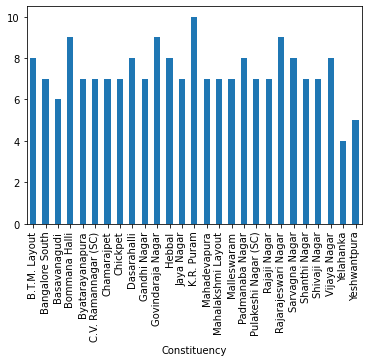

In [101]:
consGrDt['Ward'].plot.bar()

<p>To find the latitude and longitude of locations, we will use Nominatim library and since geopy is not installed on this environment, i have given the command to install the same.</p>

In [12]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

<p>Findind the latitude and longitude of Bangalore to plot the map of Bangalore later</p>

In [13]:
from geopy.geocoders import Nominatim

In [14]:
city='Bangalore'
geoloc=Nominatim(user_agent='bg_finder')
geocd=geoloc.geocode(city)
lati=geocd.latitude
longi=geocd.longitude

In [15]:
print(lati," ",longi)

12.9791198   77.5912997


<p>Plotting the constituencies of Bangalore on the map using Folium Library</p>

In [16]:
import folium

In [17]:
bang_map=folium.Map(location=[lati,longi],zoom_start=12)

for latu,long,cons in zip(bang_area['Latitude'],bang_area['Longitude'],bang_area['Constituency'].unique()):
    label=cons
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [latu,long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(bang_map)

bang_map

<p>In the map above, you can click on the circles to find the name of the constituency. A list of all the constituencies is given below.</p>

In [18]:
print(bang_area['Constituency'].unique())

['Yelahanka' 'K.R. Puram' 'Byatarayanapura' 'Yeshwantpura'
 'Rajarajeswari Nagar' 'Dasarahalli' 'Mahalakshmi Layout' 'Malleswaram'
 'Hebbal' 'Pulakeshi Nagar (SC)' 'Sarvagna Nagar' 'C.V. Ramannagar (SC)'
 'Shivaji Nagar' 'Shanthi Nagar' 'Gandhi Nagar' 'Rajaji Nagar'
 'Govindaraja Nagar' 'Vijaya Nagar' 'Chamarajpet' 'Chickpet'
 'Basavanagudi' 'Padmanaba Nagar' 'B.T.M. Layout' 'Jaya Nagar'
 'Mahadevapura' 'Bommana Halli' 'Bangalore South']


<p>Now, in order to view the wards of selected constituencies on map, we need to take a centre point. From the map above, 
it is clear that Chickpet is the obvious choice.</p>

In [183]:
address = 'Bangalore'

geoloc_ch = Nominatim(user_agent="ny_explorer")
loc_ch= geoloc_ch.geocode(address)
lat_ch = loc_ch.latitude
long_ch = loc_ch.longitude
print(lat_ch,long_ch)

12.9791198 77.5912997


In [184]:
ch_map=folium.Map(location=[lat_ch,long_ch],zoom_start=11)
for lt,ln,wd,cns in zip(bang_area['Latitude'],bang_area['Longitude'],bang_area['Ward'],bang_area['Constituency']):
    label=folium.Popup(str(cns)+' WARD:'+str(wd),parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ch_map)
    
ch_map
    

<p>Now comes the next major part. In order to find and explore the venues near a ward, we will be using the <strong>Foursquare API.</strong></p>

In [23]:
CLIENT_ID = 'SQAPXXZWG4LQHCKGFQKKWSSD3ABGMA5JCNWQU32ZSP4DOWXS' # your Foursquare ID
CLIENT_SECRET = 'KKLKD1RZCP2WQ4CGBHHXKQ40LUKGAHGRATFKGIZG1EU4C4TA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SQAPXXZWG4LQHCKGFQKKWSSD3ABGMA5JCNWQU32ZSP4DOWXS
CLIENT_SECRET:KKLKD1RZCP2WQ4CGBHHXKQ40LUKGAHGRATFKGIZG1EU4C4TA


<p>I will first try to analyse the venues near first ward and then will proceed to other wards.</p>

In [185]:
loc_name=constituencies.loc[0,'Ward']
loc_lat=constituencies.loc[0,'Latitude']
loc_long=constituencies.loc[0,'Longitude']
loc_name

'Sudham Nagara'

<p>In order to make the call to foursquare API, we need to create the uri and then with the help of this USI we can fetch the Json file containing the details of the venue near selected ward.</p>

In [186]:
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    loc_lat, 
    loc_long, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SQAPXXZWG4LQHCKGFQKKWSSD3ABGMA5JCNWQU32ZSP4DOWXS&client_secret=KKLKD1RZCP2WQ4CGBHHXKQ40LUKGAHGRATFKGIZG1EU4C4TA&v=20180605&ll=12.9593349100093,77.586192712433&radius=500&limit=100'

<p>Using the URI created above, we will make the call to foursqure API and fetch the required Json file of venues.</p>

In [187]:
#To make the request call using URL
import requests
res_data=requests.get(url).json()
res_data

{'meta': {'code': 200, 'requestId': '5f2082d5588ea57d024b8f6c'},
 'response': {'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 12.963834914509304,
    'lng': 77.59080170845317},
   'sw': {'lat': 12.954834905509296, 'lng': 77.58158371641284}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5294ccf964a520ff8227e3',
       'name': 'Mavalli Tiffin Room (MTR)',
       'location': {'address': '#14',
        'crossStreet': 'Lalbagh Rd',
        'lat': 12.955122296207755,
        'lng': 77.58555184054242,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.955122296207755,
          'lng': 77.58555184054242}],
        'distance': 474,
        'po

<p>We will again convert the json file to dataframe using json_normalize function of pandas library.</p>

In [27]:
venues=res_data['response']['groups'][0]['items']

In [188]:
# To convert JSon data into Dataframe
from pandas import json_normalize
nearby_venues=json_normalize(venues)

In [29]:
nearby_venues.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood
0,e-0-4b5294ccf964a520ff8227e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b5294ccf964a520ff8227e3,Mavalli Tiffin Room (MTR),#14,Lalbagh Rd,12.955122,77.585552,"[{'label': 'display', 'lat': 12.95512229620775...",...,560027,IN,Bangalore,Karnātaka,India,"[#14 (Lalbagh Rd), Bangalore 560027, Karnātaka...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN
1,e-0-4d8dd7abfa9437046383f2c5-1,0,"[{'summary': 'This spot is popular', 'type': '...",4d8dd7abfa9437046383f2c5,Ravindra Kalakshetra,NaN,NaN,12.962176,77.584528,"[{'label': 'display', 'lat': 12.96217625092596...",...,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",0,[],NaN


<p>In the dataframe above, there is a lot of data that we dont need for our analysis. So, we will keep only that data which is required and drop rest.</p>
<p>The attributed that we need are venue name, latitude, longitude and category of data.</p>

In [30]:
nearby=nearby_venues[['venue.name','venue.location.lat','venue.location.lng']]

In [31]:
nearby

,venue.name,venue.location.lat,venue.location.lng
0,Mavalli Tiffin Room (MTR),12.955122,77.585552
1,Ravindra Kalakshetra,12.962176,77.584528
2,Urvashi Cinemas,12.955631,77.585617
3,Springs Hotel and Spa,12.956703,77.583530
4,A.D.A. Rangamandira,12.962082,77.584191
5,Beetle Juice Bar,12.956492,77.583529
6,Sri Jaya Bakery & Sweets,12.962289,77.589632


<p>Category of venue is in nested form. So, we will use a separate function to extract the category of each venue.</p>

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
nearby['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
nearby

,venue.name,venue.location.lat,venue.location.lng,venue.categories
0,Mavalli Tiffin Room (MTR),12.955122,77.585552,Indian Restaurant
1,Ravindra Kalakshetra,12.962176,77.584528,Theater
2,Urvashi Cinemas,12.955631,77.585617,Movie Theater
3,Springs Hotel and Spa,12.956703,77.583530,Hotel
4,A.D.A. Rangamandira,12.962082,77.584191,Theater
5,Beetle Juice Bar,12.956492,77.583529,Other Nightlife
6,Sri Jaya Bakery & Sweets,12.962289,77.589632,Bakery


<p>Listing all the venues present.</p>

In [35]:
nearby['venue.categories'].unique()

array(['Indian Restaurant', 'Theater', 'Movie Theater', 'Hotel',
       'Other Nightlife', 'Bakery'], dtype=object)

<p>Since Theatre and Movie Theatre is same category. I have replaced the Movie Theatre with only Theatre to reduce redundancy</p>

In [36]:
nearby.replace({'Movie Theater':'Theater'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [37]:
nearby.head()

,venue.name,venue.location.lat,venue.location.lng,venue.categories
0,Mavalli Tiffin Room (MTR),12.955122,77.585552,Indian Restaurant
1,Ravindra Kalakshetra,12.962176,77.584528,Theater
2,Urvashi Cinemas,12.955631,77.585617,Theater
3,Springs Hotel and Spa,12.956703,77.583530,Hotel
4,A.D.A. Rangamandira,12.962082,77.584191,Theater


In [38]:
nearby.columns=[cl.split(".")[-1] for cl in nearby.columns]

<p>Renaming the Columns</p>

In [39]:
nearby=nearby[['name','categories','lat','lng']]

In [40]:
nearby

,name,categories,lat,lng
0,Mavalli Tiffin Room (MTR),Indian Restaurant,12.955122,77.585552
1,Ravindra Kalakshetra,Theater,12.962176,77.584528
2,Urvashi Cinemas,Theater,12.955631,77.585617
3,Springs Hotel and Spa,Hotel,12.956703,77.583530
4,A.D.A. Rangamandira,Theater,12.962082,77.584191
5,Beetle Juice Bar,Other Nightlife,12.956492,77.583529
6,Sri Jaya Bakery & Sweets,Bakery,12.962289,77.589632


<p>Now I will try to delve deeper and try to explore the venues near all the wards of all constituencies.</p>
<p>For this, firstly i have created a function which returns the URL corresponding to each ward. These URLs will be used to make call to foursquare API</p>

In [41]:
def find_url(loc,lat,lan):
    LIMIT=100
    radius=500
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lan, 
    radius, 
    LIMIT)
    return url

<p>Secondly, I have defined a separate function to get all the nearby venues of each ward which is passed into the function.
</p>

In [42]:
def get_df(ur,wd,lat,lon):
    result=requests.get(ur).json()
    venue=result['response']['groups'][0]['items']
    nrby_venues=json_normalize(venue)    
    for i in range(0,len(nrby_venues)):
        nrby_venues.loc[i,'Ward']=wd
        nrby_venues.loc[i,'W_Lat']=lat
        nrby_venues.loc[i,'W_Long']=lon
    return nrby_venues

<p>Now, i will create a dataframe conatining the information of venues near each ward in all the constituencies. For this 
I will make call to the above two functions.</p>

In [102]:
url=[]
df_final=pd.DataFrame()
#df_final.columns=['WardArea','WLat','Wlong','Venue','VLat','VLong','Category']
for ward,lat,lan in zip(bang_area['Ward'],bang_area['Latitude'],bang_area['Longitude']):
    url.append(find_url(ward,lat,lan))
for uri,wd,lat,lon in zip(url,bang_area['Ward'],bang_area['Latitude'],bang_area['Longitude']):
    df_n=get_df(uri,wd,lat,lon)
    df_final=df_final.append(df_n)
    
df_final.tail(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,Ward,W_Lat,W_Long,venue.location.neighborhood,venue.venuePage.id
4,e-0-58e23cabb3cdc85309cd6ccc-4,0,"[{'summary': 'This spot is popular', 'type': '...",58e23cabb3cdc85309cd6ccc,Hatti Kaapi,"132, Yemalur Main Road",NaN,12.948150,77.689790,"[{'label': 'display', 'lat': 12.94815, 'lng': ...",...,India,"[132, Yemalur Main Road, Bangalore 560037, Kar...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],Marathahalli,12.950743,77.691495,NaN,NaN
5,e-0-55cdade7498e282562b43fb4-5,0,"[{'summary': 'This spot is popular', 'type': '...",55cdade7498e282562b43fb4,Punjabi Dhaba,Yemalur,NaN,12.948909,77.687643,"[{'label': 'display', 'lat': 12.94890867256822...",...,India,"[Yemalur, Bangalore 560037, Karnātaka, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],Marathahalli,12.950743,77.691495,NaN,NaN


In [103]:
df_final.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'Ward', 'W_Lat', 'W_Long',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

<p>I have dropped the attributes/columns which are not required for out analysis.</p>

In [104]:
final_venue=df_final[['Ward', 'W_Lat', 'W_Long','venue.name','venue.location.lat', 'venue.location.lng','venue.categories']]

<p>Renaming the columns to make more sense and easy to analyse.</p>

In [105]:
final_venue.rename(columns={'venue.name':'Venue','venue.location.lat':'V_Lat','venue.location.lng':'V_Long'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [106]:
final_venue.head(2)

,Ward,W_Lat,W_Long,Venue,V_Lat,V_Long,venue.categories
0,Atturu,13.102805,77.560038,Axis Bank ATM,13.102350,77.560310,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A..."
1,Atturu,13.102805,77.560038,LG Brand Shop,13.102462,77.559921,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E..."


In [110]:
print(final_venue['Ward'].unique().shape[0])

171


<p>Now I have tried to analyse the nested structure of category attribute to fetch category type of each venue.</p>

In [111]:
final_venue['venue.categories'].head(1)

0    [{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...
Name: venue.categories, dtype: object

<p>Next, I have fetched the category of each venue and applied it to the dataframe along with the venues.</p>
<p>For this, I have defined a function as I did in previoous section.</p>

In [112]:
def get_cat(row):
    try:
        cat_list=row['categories']
    except:
        cat_list=row['venue.categories']
    if(len(cat_list)==0):
        return None
    else:
        return cat_list[0]['name']

In [113]:
final_venue['venue.categories']=final_venue.apply(get_cat,axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
final_venue.reset_index(drop=True)

,Ward,W_Lat,W_Long,Venue,V_Lat,V_Long,venue.categories
0,Atturu,13.102805,77.560038,Axis Bank ATM,13.102350,77.560310,ATM
1,Atturu,13.102805,77.560038,LG Brand Shop,13.102462,77.559921,Electronics Store
2,Yelahanka Satellite Town,13.090987,77.583925,Kanti Sweets,13.093498,77.582429,Dessert Shop
3,Yelahanka Satellite Town,13.090987,77.583925,Apollo Pharmacy,13.089411,77.582664,Pharmacy
4,Yelahanka Satellite Town,13.090987,77.583925,Shri Shiva Tiffin Centre,13.094021,77.581284,Breakfast Spot
...,...,...,...,...,...,...,...
1252,Marathahalli,12.950743,77.691495,Chai Point,12.949133,77.690612,Tea Room
1253,Marathahalli,12.950743,77.691495,California Burrito,12.949199,77.690515,Mexican Restaurant
1254,Marathahalli,12.950743,77.691495,Curry Chutney,12.949317,77.690238,Multicuisine Indian Restaurant
1255,Marathahalli,12.950743,77.691495,Hatti Kaapi,12.948150,77.689790,Coffee Shop


<p>As you can see, there are total 1257 venues in all the wards combined.</p>

<p>Changing the name of category column</p>

In [115]:
final_venue.rename(columns={'venue.categories':'V_Category'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [189]:
final_venue.head(5)

,Ward,W_Lat,W_Long,Venue,V_Lat,V_Long,V_Category
0,Atturu,13.102805,77.560038,Axis Bank ATM,13.102350,77.560310,ATM
1,Atturu,13.102805,77.560038,LG Brand Shop,13.102462,77.559921,Electronics Store
0,Yelahanka Satellite Town,13.090987,77.583925,Kanti Sweets,13.093498,77.582429,Dessert Shop
1,Yelahanka Satellite Town,13.090987,77.583925,Apollo Pharmacy,13.089411,77.582664,Pharmacy
2,Yelahanka Satellite Town,13.090987,77.583925,Shri Shiva Tiffin Centre,13.094021,77.581284,Snacks and Cafe


<p>Counting total number of categories of venues</p>

In [190]:
print("Total Categories: ",final_venue['V_Category'].unique().shape[0])

Total Categories:  162


<p>So there are total 180 different categories of venues</p>

In [117]:
final_venue['V_Category'].unique()

array(['ATM', 'Electronics Store', 'Dessert Shop', 'Pharmacy',
       'Breakfast Spot', 'Pizza Place', 'Outlet Store',
       'Indian Restaurant', 'Café', 'Tibetan Restaurant',
       'Clothing Store', 'Bus Station', 'Bus Stop', 'Movie Theater',
       'Fast Food Restaurant', 'Historic Site', 'Performing Arts Venue',
       'Outdoors & Recreation', 'Soccer Field', 'Park',
       'Recreation Center', 'Print Shop', 'Andhra Restaurant',
       'Fried Chicken Joint', 'Restaurant', 'Basketball Court', 'Bakery',
       'Juice Bar', 'Department Store', 'Hotel', 'Coffee Shop',
       'Train Station', 'Diner', 'Metro Station', 'Karnataka Restaurant',
       'Resort', 'Indian Sweet Shop', 'Shoe Store', 'Asian Restaurant',
       'Miscellaneous Shop', 'Bar', 'Vegetarian / Vegan Restaurant',
       'Playground', 'Ice Cream Shop', 'Food Truck', 'Bus Line',
       'Snack Place', 'Dog Run', 'Pub', 'Liquor Store',
       'Kerala Restaurant', 'Burger Joint', 'Gym', 'Chinese Restaurant',
       "Women's

<p>As you can see above, there are many types of restaurants such as indian, south inidan etc. But, for my analysis
I do not need different type of restaurants and this is redundant data. So I will merge all this under one category 
i.e. "Restaurants"</p>

In [122]:
final_venue['V_Category'].replace({'Movie Theater':'Theater',
                                   'Indian Restaurant':'Restaurant',
                                  'South Indian Restaurant':'Restaurant',
                                  'Fast Food Restaurant':'Fast Food Corner',
                                  'Vegetarian / Vegan Restaurant':'Restaurant',
                                  'Southern / Soul Food Restaurant':'Restaurant',
                                  'Asian Restaurant':'Restaurant',
                                  'Karnataka Restaurant':'Restaurant',
                                  'Kebab Restaurant':'Restaurant',
                                  'Maharashtrian Restaurant':'Restaurant',
                                 'Dumpling Restaurant':'Restaurant',
                                  'Hotel':'Restaurant',
                                  'Buffet':'Restaurant',
                                  'Coffee Shop':'Snacks and Cafe','Sandwich Place':'Snacks and Cafe',
                                   'Food Truck':'Snacks and Cafe','Café':'Snacks and Cafe',
                                   'Breakfast Spot':'Snacks and Cafe',
                                   'Bistro':'Snacks and Cafe',
                                   'Gym / Fitness Center':'Gym'},inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [123]:
print(len(final_venue['V_Category'].unique()))

162


<p>After removing the redundancy, number of different kind of categories left are 162</p>

In [191]:
final_venue.reset_index()

,index,Ward,W_Lat,W_Long,Venue,V_Lat,V_Long,V_Category
0,0,Atturu,13.102805,77.560038,Axis Bank ATM,13.102350,77.560310,ATM
1,1,Atturu,13.102805,77.560038,LG Brand Shop,13.102462,77.559921,Electronics Store
2,0,Yelahanka Satellite Town,13.090987,77.583925,Kanti Sweets,13.093498,77.582429,Dessert Shop
3,1,Yelahanka Satellite Town,13.090987,77.583925,Apollo Pharmacy,13.089411,77.582664,Pharmacy
4,2,Yelahanka Satellite Town,13.090987,77.583925,Shri Shiva Tiffin Centre,13.094021,77.581284,Snacks and Cafe
...,...,...,...,...,...,...,...,...
1252,1,Marathahalli,12.950743,77.691495,Chai Point,12.949133,77.690612,Tea Room
1253,2,Marathahalli,12.950743,77.691495,California Burrito,12.949199,77.690515,Mexican Restaurant
1254,3,Marathahalli,12.950743,77.691495,Curry Chutney,12.949317,77.690238,Multicuisine Indian Restaurant
1255,4,Marathahalli,12.950743,77.691495,Hatti Kaapi,12.948150,77.689790,Snacks and Cafe


<p>In order to analyse the categorical data, I have converted the categories of each venue in binary form i.e. now the categories are attributes of each venue. If a venue' category is ATM, then only ATM attribute will have value equal to 1 and other attributes will be 0. I have used get_dummies function for this work. </p>

In [125]:
dummy=pd.get_dummies(final_venue,columns=['V_Category'],prefix="", prefix_sep="")

In [126]:
dummy

,Ward,W_Lat,W_Long,Venue,V_Lat,V_Long,ATM,American Restaurant,Andhra Restaurant,Arcade,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Atturu,13.102805,77.560038,Axis Bank ATM,13.102350,77.560310,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Atturu,13.102805,77.560038,LG Brand Shop,13.102462,77.559921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Yelahanka Satellite Town,13.090987,77.583925,Kanti Sweets,13.093498,77.582429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yelahanka Satellite Town,13.090987,77.583925,Apollo Pharmacy,13.089411,77.582664,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yelahanka Satellite Town,13.090987,77.583925,Shri Shiva Tiffin Centre,13.094021,77.581284,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Marathahalli,12.950743,77.691495,Chai Point,12.949133,77.690612,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marathahalli,12.950743,77.691495,California Burrito,12.949199,77.690515,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marathahalli,12.950743,77.691495,Curry Chutney,12.949317,77.690238,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marathahalli,12.950743,77.691495,Hatti Kaapi,12.948150,77.689790,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>Since we are going to use only ward/location for type of category, I have dropped the venue details in below step.</p>

In [127]:
dummy.drop(['W_Lat','W_Long','Venue','V_Lat','V_Long'],axis=1,inplace=True)

In [128]:
dummy

,Ward,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Atturu,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Atturu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Yelahanka Satellite Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yelahanka Satellite Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yelahanka Satellite Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Marathahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marathahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marathahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marathahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>I have grouped the dataframe by "Ward." It will giv me the clarity on how many ATM or sandwich places are there in 
a particular location/ward.</p>

In [129]:
grp_CatData=dummy.groupby(['Ward']).sum().reset_index()

In [130]:
grp_CatData

,Ward,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,A Narayanapura,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agaram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agrahara Dasarahalli,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vrisabhavathi Nagar,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,Yediyur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,Yelahanka Satellite Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,Yelchenahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>From above data, it is clear that there are 3 Theatres in Sudham Nagara and 2 in Dharma Swamy Temple area.</p>

In [131]:
grp_CatData.reset_index(drop=True).head(1)

,Ward,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,A Narayanapura,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
grp_CatData.head()

,Ward,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,A Narayanapura,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agaram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agrahara Dasarahalli,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>Again, here I have grouped that data by "Ward." But this time i have taken the mean while grouping the data and 
it gives the similar picture. I have taken the mean for further analysis of data.</p>

In [133]:
meanBang=dummy.groupby(['Ward']).mean().reset_index()

In [134]:
meanBang

,Ward,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,A Narayanapura,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agaram,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Agrahara Dasarahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Vrisabhavathi Nagar,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,Yediyur,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,Yelahanka Satellite Town,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,Yelchenahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
meanBang=meanBang.set_index('Ward')

In [136]:
meanBang

,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,...,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
Ward,,,,,,,,,,,,,,,,,,,,,
A Narayanapura,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agaram,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agrahara Dasarahalli,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vrisabhavathi Nagar,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yediyur,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.090909,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yelahanka Satellite Town,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p>Next i am going to try to find the top 5 venues of each ward. This will give a better picture of the data and will help in clustering algorithm. For this purpose i will take the transpose of above data and then sort the data in descending form for each ward one by one.</p>

In [137]:
meanBTran=meanBang.T

<p>For example, sorting the table as per Girinagar, it is clear that top 4 venues are Restaurant, Snack Place, Breakfast Spot and Bus station.</p> 

In [138]:
meanBTran.sort_values(['Girinagar'],ascending=False)

Ward,A Narayanapura,Adugodi,Agaram,Agrahara Dasarahalli,Anjanapura,Arakere,Aramane Nagara,Attiguppe,Atturu,Azad Nagar,...,Vidyapeeta ward,Vijayanagar,Vijnana Nagar,Vishveshwara Puram,Vishwanath Nagenahalli,Vrisabhavathi Nagar,Yediyur,Yelahanka Satellite Town,Yelchenahalli,Yeshwanthpura
Snack Place,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.0,0.090909,0.00,0.0,0.000000,0.0,0.0,0.0
Restaurant,0.25,0.5,0.0,0.25,0.0,0.0,0.0,0.214286,0.0,0.00,...,0.000000,0.00,0.5,0.272727,0.25,0.0,0.454545,0.0,0.0,0.5
Bus Station,0.25,0.0,0.5,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.25,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
Snacks and Cafe,0.00,0.5,0.0,0.25,0.0,0.0,0.0,0.214286,0.0,0.25,...,0.333333,0.00,0.0,0.181818,0.00,0.0,0.000000,0.2,0.0,0.0
Paper / Office Supplies Store,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.090909,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fast Food Corner,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.25,...,0.333333,0.00,0.5,0.090909,0.00,0.0,0.000000,0.0,0.0,0.0
Flea Market,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
Flower Shop,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
Food,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.0,0.000000,0.00,0.0,0.090909,0.0,0.0,0.0


<p>Now i will try to add top 5 venue for each region in a dataframe</p>

In [140]:
df_CmVen=pd.DataFrame(columns=['Ward','1st Common Venue','2nd Common Venue','3rd Common Venue','4th Common Venue','5th Common Venue'])

for col in meanBTran.columns:
    sWard=meanBTran[[col]]
    sWard.sort_values(col,ascending=False,inplace=True)
    sWard=sWard.reset_index().head(5)
    df_CmVen=df_CmVen.append({'Ward':col,
                    '1st Common Venue':sWard.iloc[0,0],
                    '2nd Common Venue':sWard.iloc[1,0],
                    '3rd Common Venue':sWard.iloc[2,0],
                    '4th Common Venue':sWard.iloc[3,0],
                    '5th Common Venue':sWard.iloc[2,0]},ignore_index=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<p>Below is my datafrae with top 3 venues for each region</p>

In [141]:
df_CmVen

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
0,A Narayanapura,Restaurant,Bus Station,Bus Stop,Theater,Bus Stop
1,Adugodi,Snacks and Cafe,Restaurant,Men's Store,Mexican Restaurant,Men's Store
2,Agaram,Burger Joint,Bus Station,ATM,Music Venue,ATM
3,Agrahara Dasarahalli,Bagel Shop,Athletics & Sports,Restaurant,Snacks and Cafe,Restaurant
4,Anjanapura,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
...,...,...,...,...,...,...
166,Vrisabhavathi Nagar,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
167,Yediyur,Restaurant,Food,Lake,Department Store,Lake
168,Yelahanka Satellite Town,Snacks and Cafe,Pizza Place,Dessert Shop,Outlet Store,Dessert Shop
169,Yelchenahalli,Sporting Goods Shop,ATM,Museum,Mexican Restaurant,Museum


<h3>Clustering of data</h3>

In [142]:
meanBang.reset_index(inplace=True)

In [143]:
meanBangClst=meanBang.drop('Ward', axis=1)

<p>Finding optimum value of K for KMean by using <strong>Elbow method</strong></p>

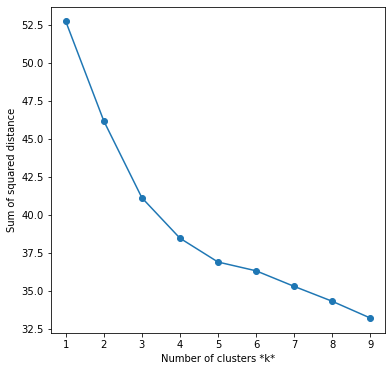

In [146]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(meanBangClst)
    sse.append(km.inertia_)

# Plot sse against k
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

<p>From above elbow curve, I can say that k=5 is optimum value of K for K Mean clustering</p>

<p>Running the clustering algorithm to divide the data set into three clusters.</p>

In [148]:
from sklearn.cluster import KMeans
no_clstr=5
km=KMeans(n_clusters=no_clstr,random_state=0)
km.fit(meanBangClst)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

<p>Let's look at the lables of clusters</p>

<!--# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(meanBangClst)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');-->

<!--sse = []
list_k = list(range(1, 6))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(meanBangClst)
    sse.append(km.inertia_)

# Plot sse against k
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')-->

In [150]:
km.labels_

array([4, 2, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 2, 1, 1, 4, 2, 1, 4, 4, 1, 4,
       4, 1, 4, 1, 1, 2, 1, 1, 4, 2, 4, 1, 4, 4, 2, 1, 4, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 4, 3, 1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 4,
       2, 1, 1, 2, 2, 2, 4, 4, 3, 4, 1, 4, 2, 3, 1, 4, 4, 4, 1, 4, 4, 4,
       4, 3, 4, 1, 1, 2, 4, 1, 4, 2, 4, 4, 2, 4, 1, 4, 1, 4, 2, 2, 2, 3,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 1, 1, 4, 1, 4, 2, 1, 4, 4, 1, 4, 4,
       4, 4, 1, 4, 4, 1, 1, 2, 4, 1, 4, 4, 3, 1, 4, 4, 1], dtype=int32)

<p>Now I will add the clusters label to each ward in our top 5 venue table. </p>

In [151]:

df_CmVen.insert(0,'Cluster Label',km.labels_)

In [152]:
df_CmVen

,Cluster Label,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
0,4,A Narayanapura,Restaurant,Bus Station,Bus Stop,Theater,Bus Stop
1,2,Adugodi,Snacks and Cafe,Restaurant,Men's Store,Mexican Restaurant,Men's Store
2,4,Agaram,Burger Joint,Bus Station,ATM,Music Venue,ATM
3,4,Agrahara Dasarahalli,Bagel Shop,Athletics & Sports,Restaurant,Snacks and Cafe,Restaurant
4,3,Anjanapura,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
...,...,...,...,...,...,...,...
166,3,Vrisabhavathi Nagar,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
167,1,Yediyur,Restaurant,Food,Lake,Department Store,Lake
168,4,Yelahanka Satellite Town,Snacks and Cafe,Pizza Place,Dessert Shop,Outlet Store,Dessert Shop
169,4,Yelchenahalli,Sporting Goods Shop,ATM,Museum,Mexican Restaurant,Museum


In [153]:
labelled_clusters=df_CmVen.set_index('Ward')

<p>Final table with wards, their alloted clusters and top 5 venues</p>

In [154]:
labelled_clusters

,Cluster Label,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
Ward,,,,,,
A Narayanapura,4,Restaurant,Bus Station,Bus Stop,Theater,Bus Stop
Adugodi,2,Snacks and Cafe,Restaurant,Men's Store,Mexican Restaurant,Men's Store
Agaram,4,Burger Joint,Bus Station,ATM,Music Venue,ATM
Agrahara Dasarahalli,4,Bagel Shop,Athletics & Sports,Restaurant,Snacks and Cafe,Restaurant
Anjanapura,3,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
...,...,...,...,...,...,...
Vrisabhavathi Nagar,3,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
Yediyur,1,Restaurant,Food,Lake,Department Store,Lake
Yelahanka Satellite Town,4,Snacks and Cafe,Pizza Place,Dessert Shop,Outlet Store,Dessert Shop


<p>Next, I will try to prepare the table for plotting. For this I would need the name of Constituency and the longitude
, latitude of each ward in the cluster labelled table. So, merging the constituences and above table</p>

In [155]:
dForPlot=bang_area.join(labelled_clusters,on='Ward')

In [156]:
dForPlot.dropna(inplace=True)

<p>If clusters label are in float, then there could be a mismatch of datatype during plotting. So onverting cluster 
label to integre.</p>

In [157]:
dForPlot['Cluster Label']=dForPlot['Cluster Label'].astype('int')

In [158]:
dForPlot

,Ward,Constituency,Latitude,Longitude,Cluster Label,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
1,Atturu,Yelahanka,13.102805,77.560038,3,ATM,Electronics Store,Pizza Place,Middle Eastern Restaurant,Pizza Place
2,Yelahanka Satellite Town,Yelahanka,13.090987,77.583925,4,Snacks and Cafe,Pizza Place,Dessert Shop,Outlet Store,Dessert Shop
5,Hudi,K.R. Puram,13.022376,77.705493,4,Pizza Place,Snacks and Cafe,Tibetan Restaurant,Restaurant,Tibetan Restaurant
6,Devasandra,K.R. Puram,13.001797,77.689122,4,Clothing Store,ATM,Nightclub,Miscellaneous Shop,Nightclub
7,A Narayanapura,K.R. Puram,12.994474,77.672583,4,Restaurant,Bus Station,Bus Stop,Theater,Bus Stop
...,...,...,...,...,...,...,...,...,...,...
191,Vasanthpura,Bangalore South,12.891422,77.556846,1,Tennis Court,Restaurant,ATM,Mexican Restaurant,ATM
192,J P Nagar,Jaya Nagar,12.910882,77.594507,1,Restaurant,Snacks and Cafe,Pizza Place,Park,Pizza Place
193,Madivala,B.T.M. Layout,12.920018,77.614418,4,Restaurant,Pizza Place,Park,Snacks and Cafe,Park
194,Ramamurthy Nagar,K.R. Puram,13.033613,77.676539,2,Snacks and Cafe,Park,Furniture / Home Store,Museum,Furniture / Home Store


<p>Now i will plot the wards on maps and will use different color for each cluster so that it is easy to visualize various clusters on map.
You can click on circle marker to see the popup containing information such as name of  ward and cluster number.</p>

<p>I will use the folium library for plotting on map.</p>

In [159]:
#plotting clusters on map
ch_map=folium.Map(location=[lat_ch,long_ch],zoom_start=11)

In [162]:
colour=['Red', 'Blue','Green','Yellow','Black']

In [163]:
for lat,lon,ward,clstr in zip(dForPlot['Latitude'],dForPlot['Longitude'],dForPlot['Ward'],dForPlot['Cluster Label']):
    label=folium.Popup(str(ward)+' Cluster:'+str(clstr),parse_html=True)
    folium.CircleMarker([lat,lon],
                       popup=label,
                       radius=5,
                       color=colour[clstr-1],
                       fill=True,
                       fill_color=colour[clstr-1],
                       fill_opacity=0.7).add_to(ch_map)
ch_map

<h4>Analysing Cluster One</h4>
<p>There is only one ward in this cluster. So, I cannot make a general assumption about this cluster. Let's look at other clusters.</p>

In [173]:
clus_one=dForPlot.loc[dForPlot['Cluster Label']==0,dForPlot.columns[[0,5,6,7,8,9]]]
clus_one

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
109,Kaveripura,Park,ATM,Museum,Mexican Restaurant,Museum


<h4>Analysing Second cluster</h4>
<p>It is evident from the table below of second cluster that top most common venue in this region is Restaurant and we can easily say that this is a hub for food. So these regions/wards are ideal for opening Restaurants.
We can name this Cluster as <strong>Restaurant Cluster</strong></p>

In [169]:
clus_two=dForPlot.loc[dForPlot['Cluster Label']==1,dForPlot.columns[[0,5,6,7,8,9]]]
clus_two

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
8,Vijnana Nagar,Fast Food Corner,Restaurant,ATM,Mexican Restaurant,ATM
20,Herohalli,Restaurant,Fried Chicken Joint,ATM,Middle Eastern Restaurant,ATM
23,J P Park,Restaurant,Park,ATM,Middle Eastern Restaurant,ATM
24,Yeshwanthpura,Restaurant,Clothing Store,ATM,Miscellaneous Shop,ATM
26,Lakshmi Devi Nagar,Restaurant,ATM,Diner,Miscellaneous Shop,Diner
38,Nandini Layout,Restaurant,Park,ATM,Middle Eastern Restaurant,ATM
46,Malleswaram,Restaurant,Snacks and Cafe,Juice Bar,Park,Juice Bar
48,Kadu Malleshwar Ward,Restaurant,Snacks and Cafe,Ice Cream Shop,Department Store,Ice Cream Shop
54,Hebbala,Restaurant,Pizza Place,Department Store,Park,Department Store
57,Gangenahalli,Restaurant,Pizza Place,Fast Food Corner,Middle Eastern Restaurant,Fast Food Corner


<h4>Analysing Cluster three</h4>
<p>The top most common venue in this cluster is Snacks and Cafe. Snacks and Cafe is a merged category that contains 
Breakfast places, quick bites and Coffee Place. We can name this cluster as <strong>Quick Bite</strong></p>

In [170]:
clus_three=dForPlot.loc[dForPlot['Cluster Label']==2,dForPlot.columns[[0,5,6,7,8,9]]]
clus_three

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
18,Kengeri,Snacks and Cafe,Restaurant,Men's Store,Mexican Restaurant,Men's Store
22,Rajarajeshwari Nagar,Snacks and Cafe,Bakery,Department Store,Juice Bar,Department Store
28,Kottegepalya,Snacks and Cafe,Park,Museum,Mexican Restaurant,Museum
41,Mahalakshimpuram,Snacks and Cafe,Bakery,Park,Restaurant,Park
77,New Tippasandara,Snacks and Cafe,Cafeteria,Pet Store,Performing Arts Venue,Pet Store
78,Sarvagna Nagar,Snacks and Cafe,Golf Course,Music Venue,Mexican Restaurant,Music Venue
82,Ramaswamy Palya,Snacks and Cafe,Electronics Store,Metro Station,Middle Eastern Restaurant,Metro Station
89,Domlur,Snacks and Cafe,Restaurant,Rajasthani Restaurant,Pub,Rajasthani Restaurant
107,Prakash Nagar,Snacks and Cafe,Bakery,ATM,Museum,ATM
125,Deepanjali Nagar,Snacks and Cafe,Restaurant,Men's Store,Mexican Restaurant,Men's Store


<h4>Analyzing Cluster Four</h4>
<p>In the cluster, the top most common venue is ATM. So, it can work as guide for people who are looking for ATMs. Also, the clusters are great for Middle Eastern, Mexican Restaurants and pizza places. We can name this CLuster as <strong>ATM Hub</strong></p>

In [171]:
clus_four=dForPlot.loc[dForPlot['Cluster Label']==3,dForPlot.columns[[0,5,6,7,8,9]]]
clus_four

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
1,Atturu,ATM,Electronics Store,Pizza Place,Middle Eastern Restaurant,Pizza Place
21,Jalahalli,ATM,Basketball Court,Music Venue,Middle Eastern Restaurant,Music Venue
27,Laggere,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
30,Mallasandra,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
37,Vrisabhavathi Nagar,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
62,Muneshwara Nagar,ATM,Falafel Restaurant,Pizza Place,Middle Eastern Restaurant,Pizza Place
128,Rayapuram,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant
184,Anjanapura,ATM,Pizza Place,Mexican Restaurant,Middle Eastern Restaurant,Mexican Restaurant


<h4>Analyzing Cluster Five</h4>
<p>Looking at the second cluster, it is clear that there is no top most common venue in this region. It is a mix of Gym, Bakery, Theatre, clothing store, Dance Studio, Sporting Goods shop and ATM. Actually, there are 45 unique categories of venues are there in top most common venue. This cluster seems perfect for living as all the basic amenities are available nearby. This cluster could be named as <strong>Housing Cluster</strong></p>

In [175]:
clus_five=dForPlot.loc[dForPlot['Cluster Label']==4,dForPlot.columns[[0,5,6,7,8,9]]]
clus_five['1st Common Venue'].unique().shape[0]

45

In [176]:
clus_five

,Ward,1st Common Venue,2nd Common Venue,3rd Common Venue,4th Common Venue,5th Common Venue
2,Yelahanka Satellite Town,Snacks and Cafe,Pizza Place,Dessert Shop,Outlet Store,Dessert Shop
5,Hudi,Pizza Place,Snacks and Cafe,Tibetan Restaurant,Restaurant,Tibetan Restaurant
6,Devasandra,Clothing Store,ATM,Nightclub,Miscellaneous Shop,Nightclub
7,A Narayanapura,Restaurant,Bus Station,Bus Stop,Theater,Bus Stop
10,Dodda Bommasandra,Historic Site,Performing Arts Venue,ATM,Music Venue,ATM
...,...,...,...,...,...,...
180,Yelchenahalli,Sporting Goods Shop,ATM,Museum,Mexican Restaurant,Museum
186,K R Puram,Boat or Ferry,Lake,Restaurant,Pharmacy,Restaurant
187,Jnana Bharathi ward,Theater,ATM,Music Venue,Mexican Restaurant,Music Venue
193,Madivala,Restaurant,Pizza Place,Park,Snacks and Cafe,Park


<h3>Thank You!</h3>